In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
profile_data = 'ERA-HIST-Tlake_prof.dat'

In [3]:
with open(profile_data, 'r') as data_file:
	tempr_prof_a = []
	for line in data_file:
	    line_vals = line.split()
	    line_vals_f = list(map(float, line_vals))
	    tempr_prof_a.append(line_vals_f[1:31]) # NOTE: the change of lake level causes the number of water colomn varies. Here we only take the top 500m. 


In [4]:
tempr_prof_a = tempr_prof_a[341:-11]

tempr_prof = np.array(tempr_prof_a, dtype = float)
tempr_prof_sea = tempr_prof.reshape(36, 12, 30)
prof_sea_ave = np.mean(tempr_prof_sea, axis = 0)
prof_sea_ave = prof_sea_ave.T

In [5]:
def plot_prof_output(datain):
	matplotlib.style.use('ggplot')
	fig1 = plt.figure(figsize = (8, 8))
	ax1 = fig1.add_subplot(1,1,1)
	vmin = prof_sea_ave.min()
	vmax = prof_sea_ave.max()
	c_level = np.linspace(vmin,vmax, 5)
	cf_level = np.linspace(vmin,vmax, 100)
	c = plt.contour(datain, levels = c_level, colors = 'black')
	plt.clabel(c, inline=1, fontsize=12,  fmt = '%.2f', colors = 'black')
	cf = plt.contourf(datain, cmap = 'jet',levels = cf_level, vmin = vmin, vmax = vmax, extend = 'both')
	cbar = fig1.colorbar(cf, ticks=c_level, format = '%.2f',extend='both' )
	cbar.set_label('$^\circ$C ', fontsize=15)
	cbar.ax.tick_params(labelsize= 12)
	plt.gca().invert_yaxis()
	plt.xlabel('Months', fontsize = 14)
	plt.ylabel('water depth (m)', fontsize = 18)
	plt.xticks(np.arange(0,12), np.arange(1,13),fontsize = 15)
	plt.yticks(np.arange(0, 31, 5), np.arange(0, 31, 5)*10,fontsize = 15)
	plt.title('Lake Temperature Profile',fontsize = 17)
	plt.show()

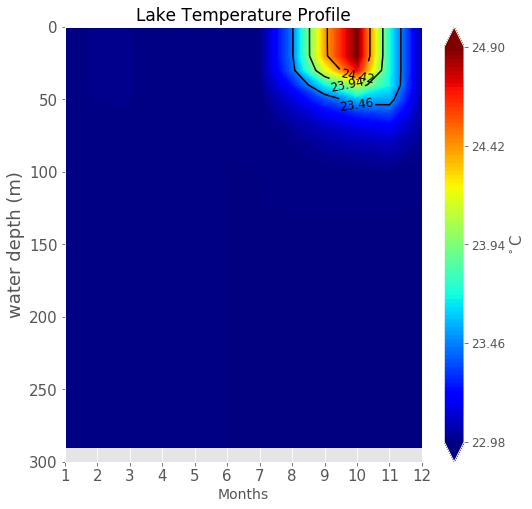

In [6]:
plot_prof_output(prof_sea_ave)